# EXPLORATORY DATA ANALYSIS ON A DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.	Data Cleaning and Preparation:

In [4]:
# Load the dataset into a DataFrame 
df = pd.read_csv('Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:
df.shape

(2126, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
# Handle missing values 
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [10]:
# Identify and correct any inconsistencies in data types 
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.duplicated().sum()

0

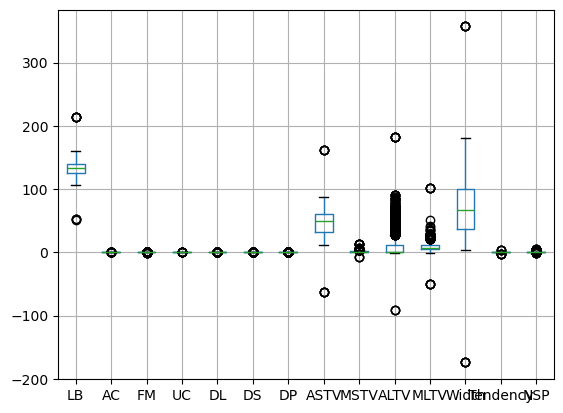

In [13]:
#Outliers

df.boxplot()
plt.show()

In [30]:
#	Detect and treat outliers if necessary.
def outlier_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Loop to apply the function to all numeric columns
for col in df.select_dtypes(['int', 'float']).columns:
    outlier_capping(df, col)

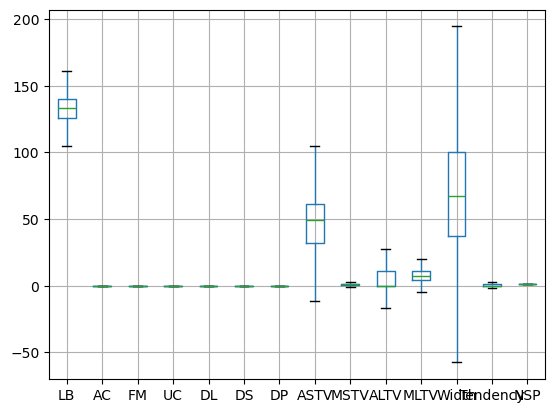

In [32]:
df.boxplot()
plt.show()

# 2. Statistical Summary

In [37]:
# Descriptive statistics
summary = df.describe().T
summary['median'] = df.median()
summary['IQR'] = summary['75%'] - summary['25%']
summary[['mean', 'median', 'std', 'IQR']]

,mean,median,std,IQR
LB,133.291604,133.000000,9.976211,14.000000
AC,0.003144,0.001631,0.003844,0.005650
FM,0.001565,0.000000,0.002477,0.002559
UC,0.004361,0.004484,0.003008,0.004705
DL,0.001770,0.000000,0.002675,0.003295
DS,0.000000,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000,0.000000
ASTV,46.999304,49.000000,17.633594,29.000000
MSTV,1.301912,1.200000,0.779896,1.000000
ALTV,6.733464,0.000000,10.400402,11.000000


#  3. Data Visualization

### Histogram

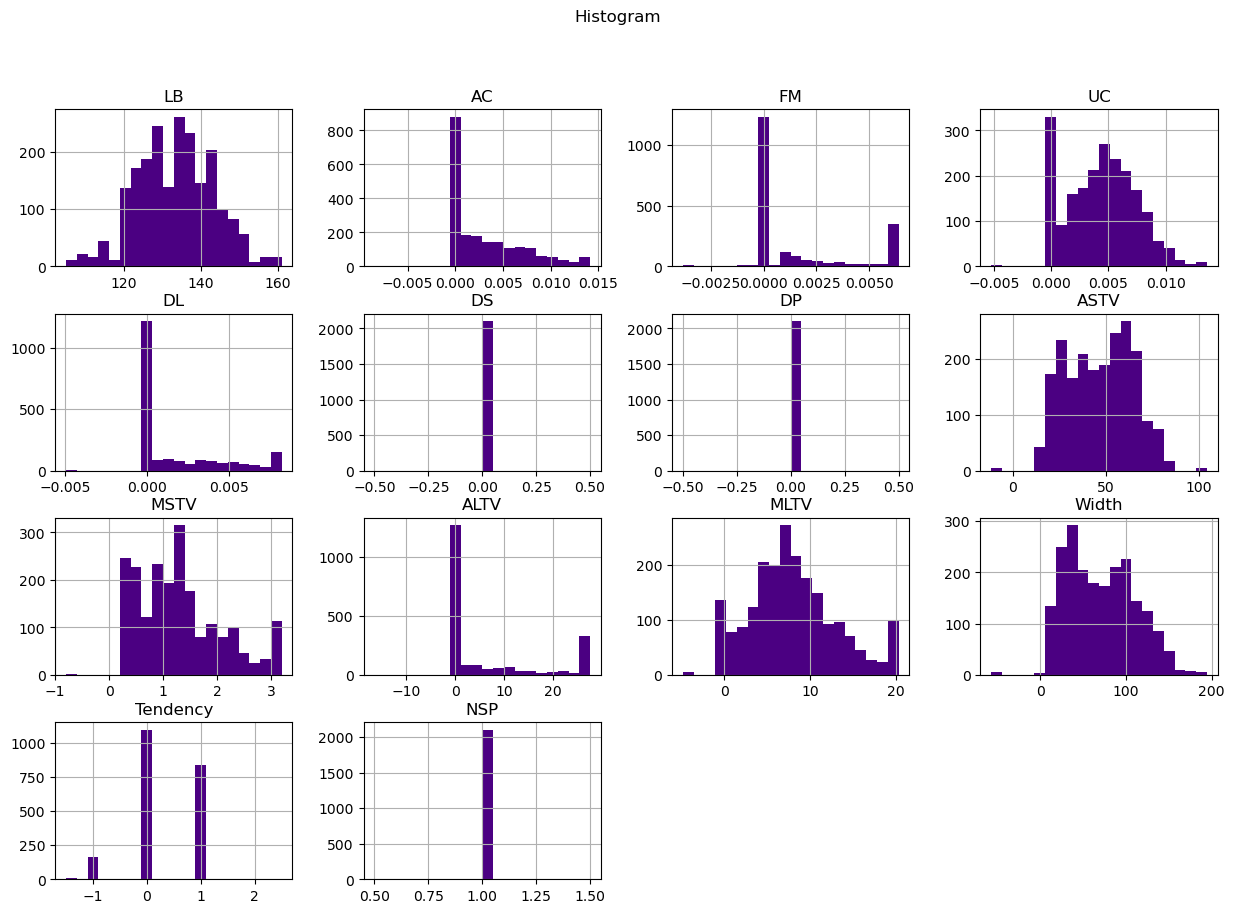

In [47]:
df.hist(bins = 20, figsize = (15,10), color='indigo')
plt.suptitle('Histogram')
plt.show()

### Bar chart

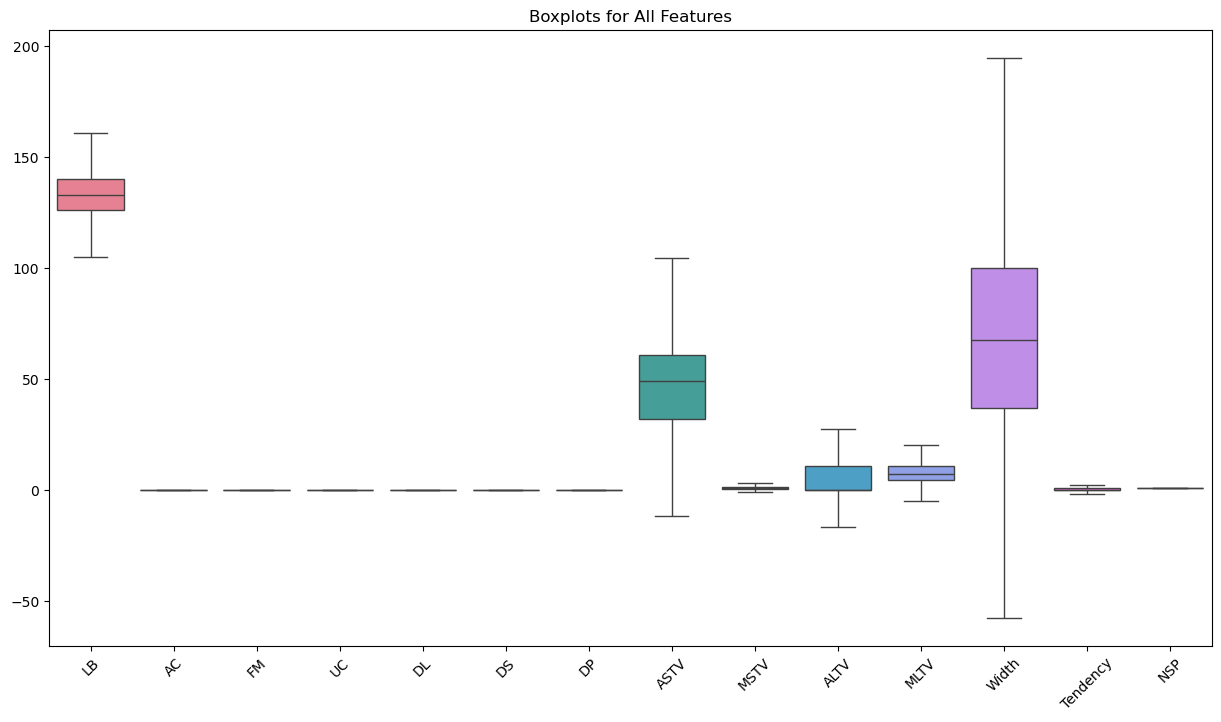

In [50]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplots for All Features")
plt.xticks(rotation=45)
plt.show()

### Corelation heatmap

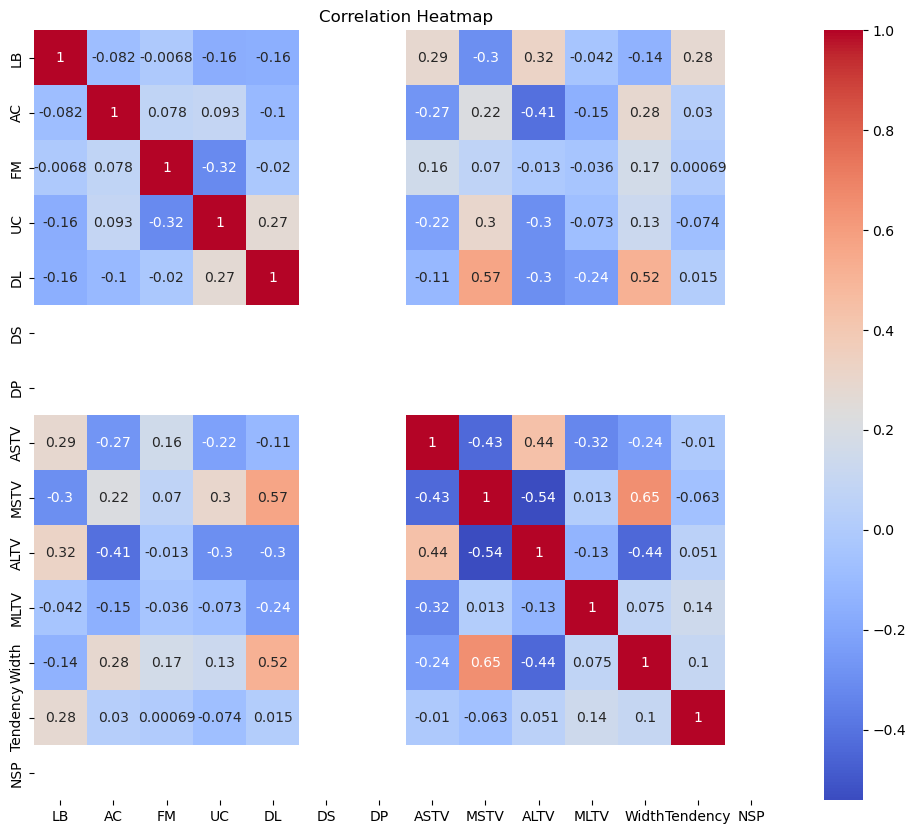

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Pairplot

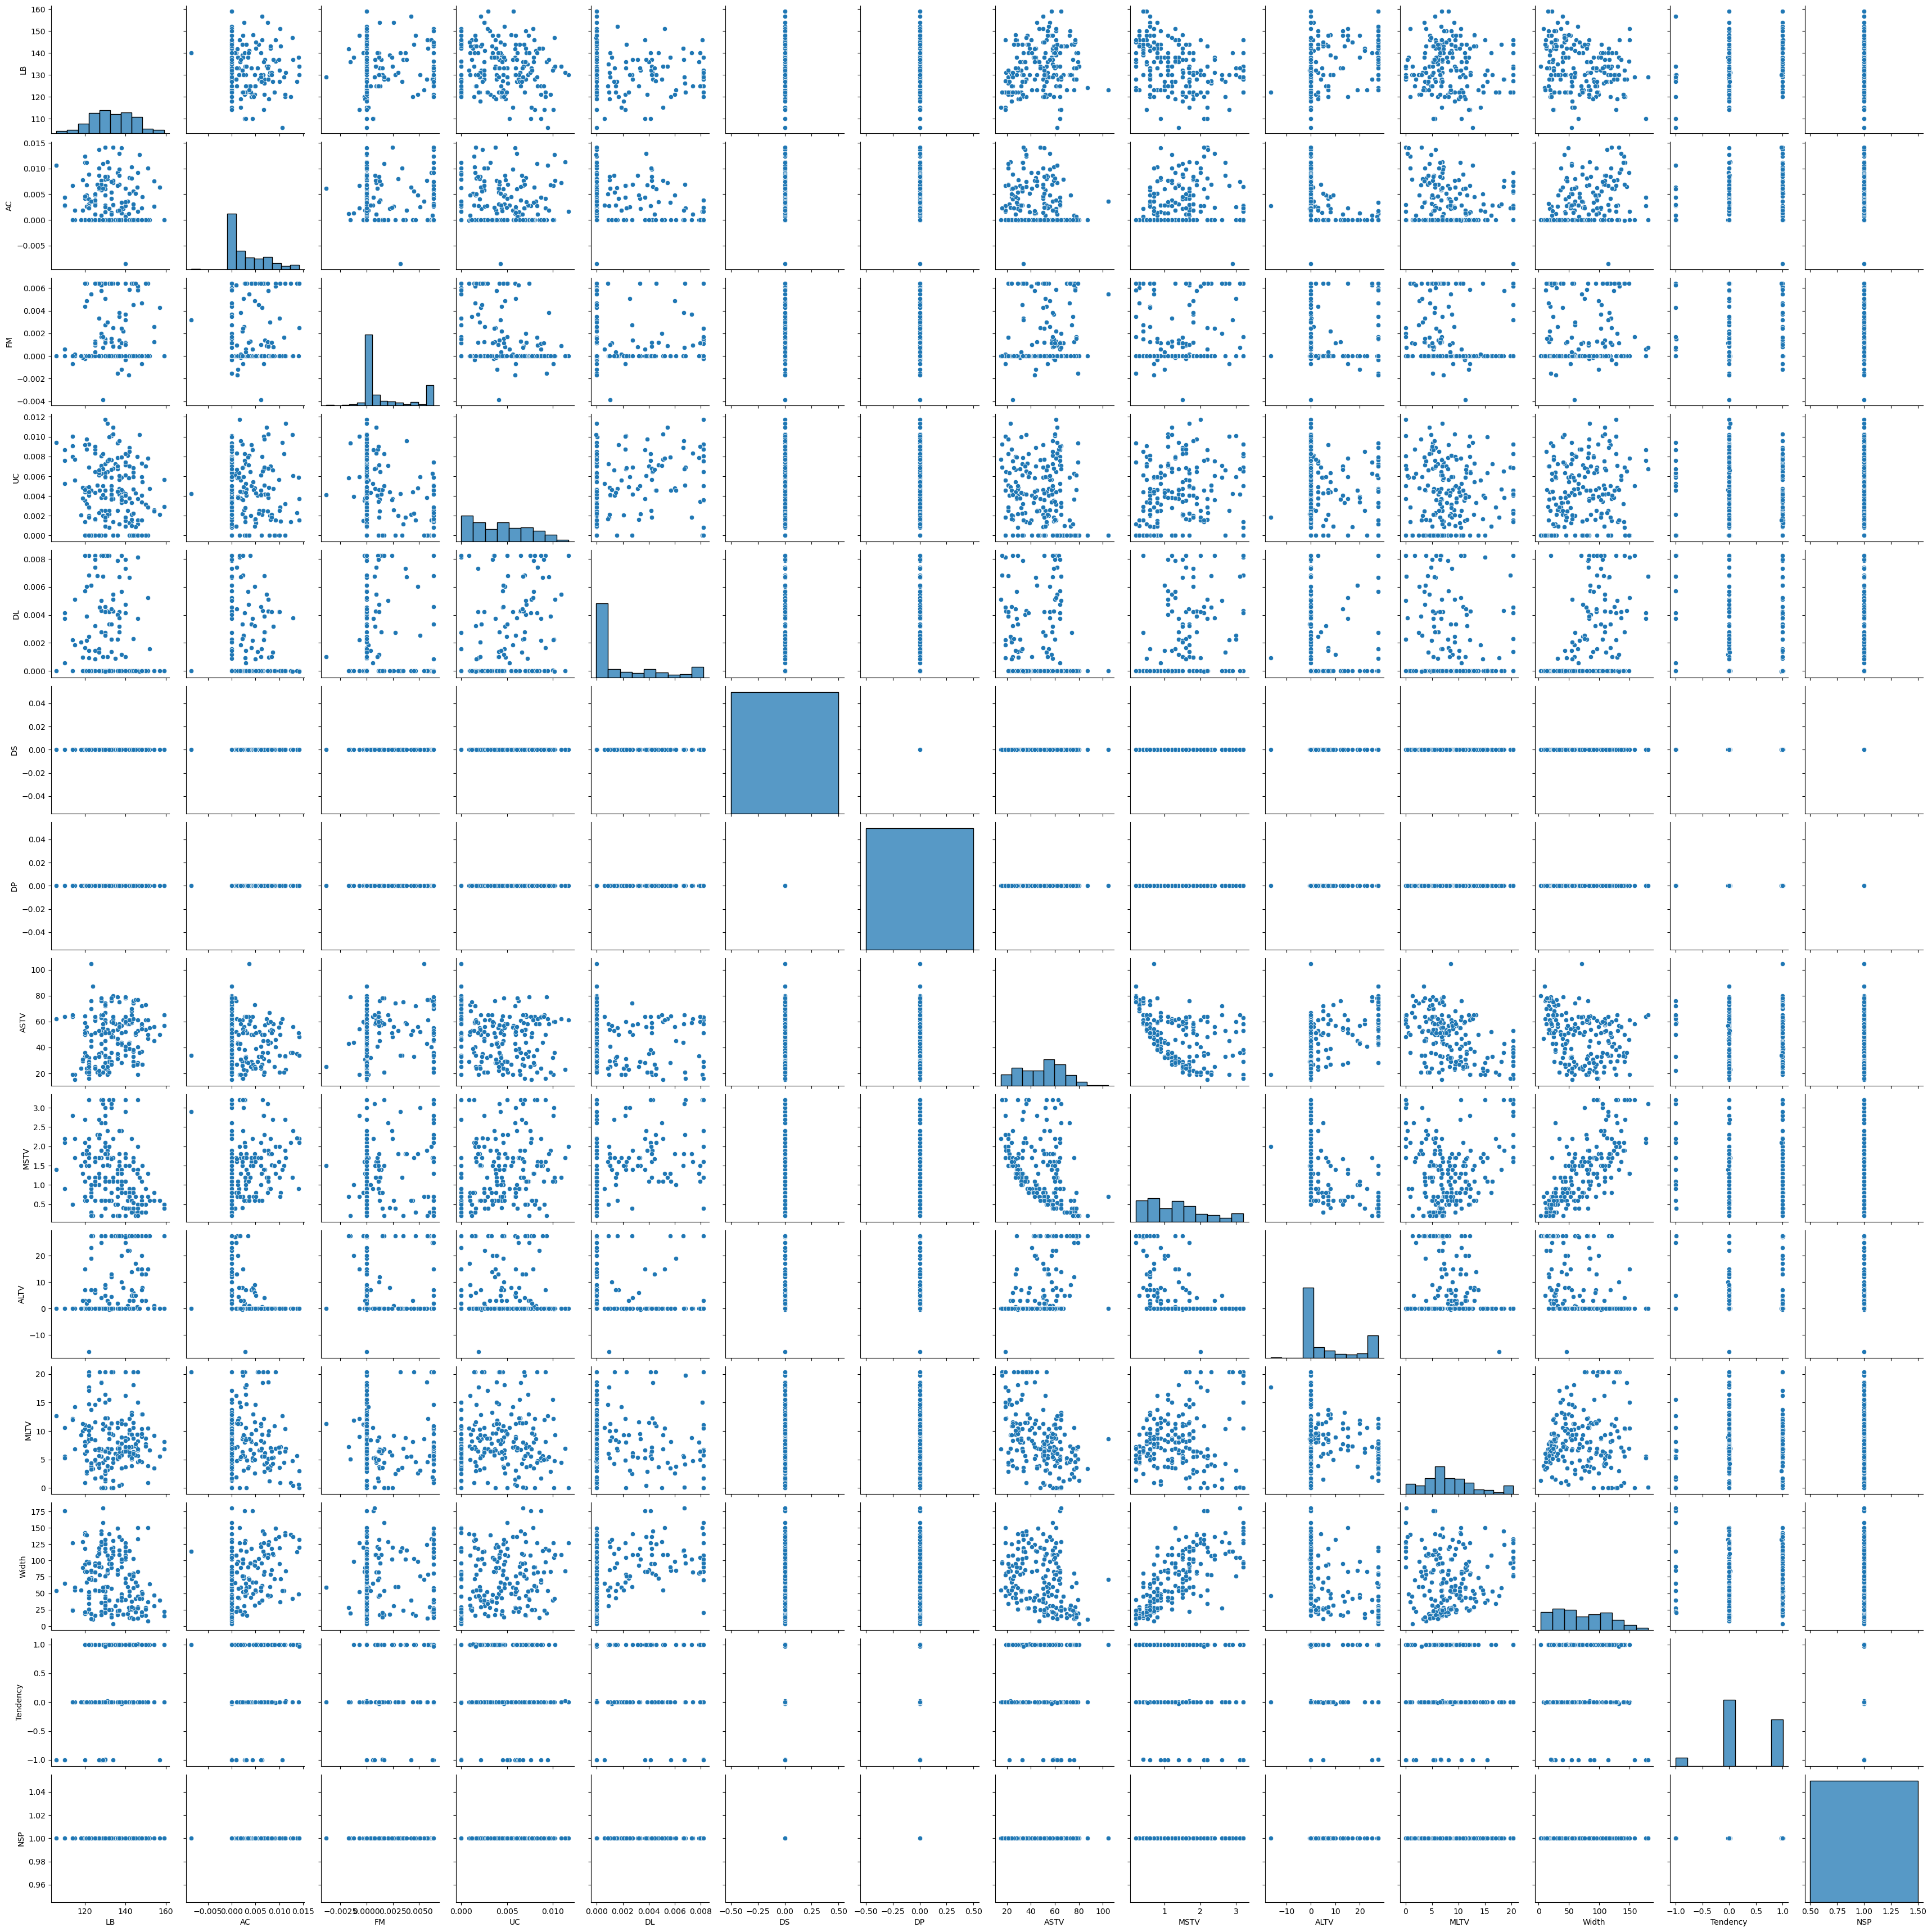

In [58]:
sns.pairplot(df.sample(200))  # sample for performance
plt.show()

### Violin plot

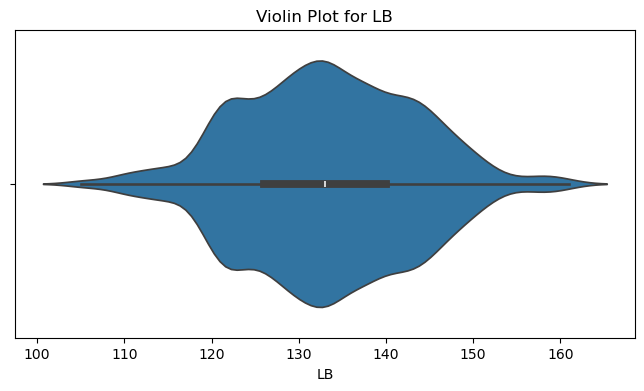

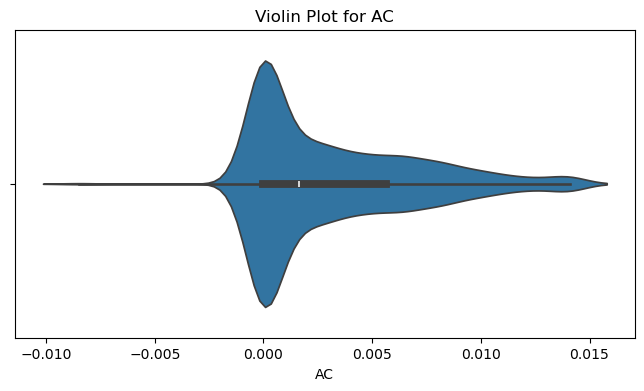

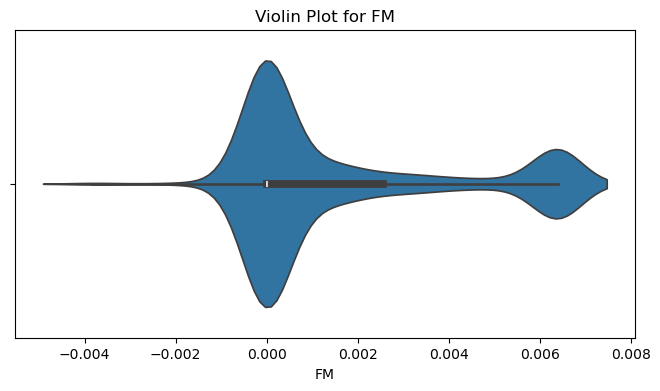

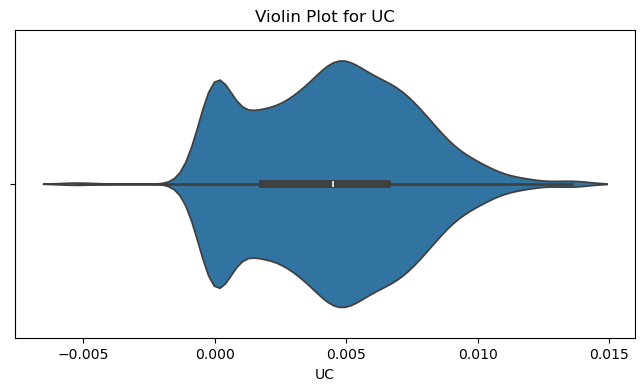

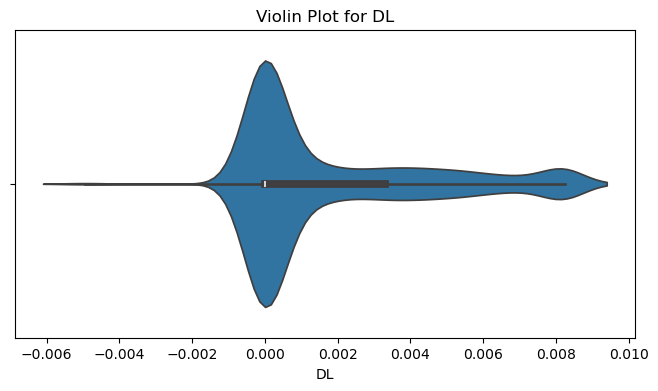

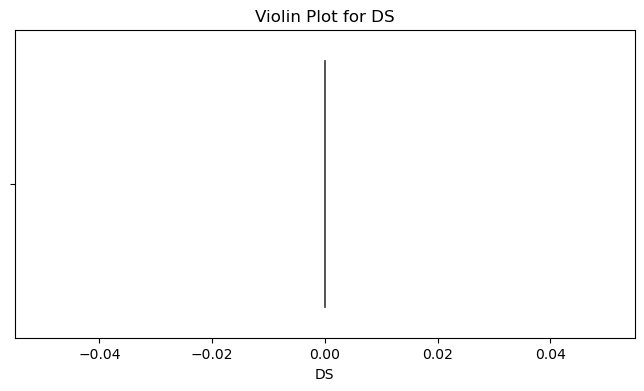

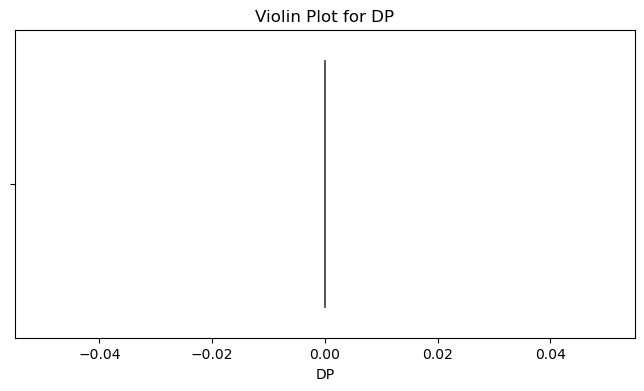

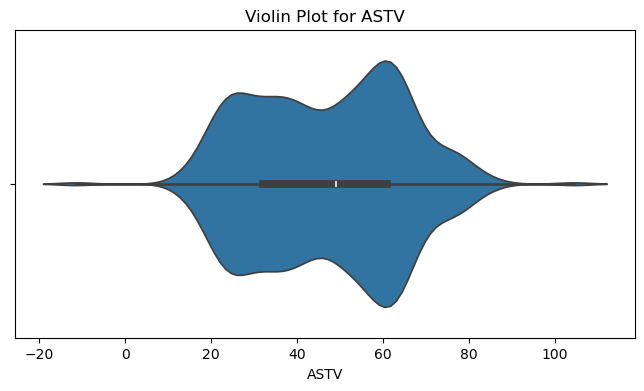

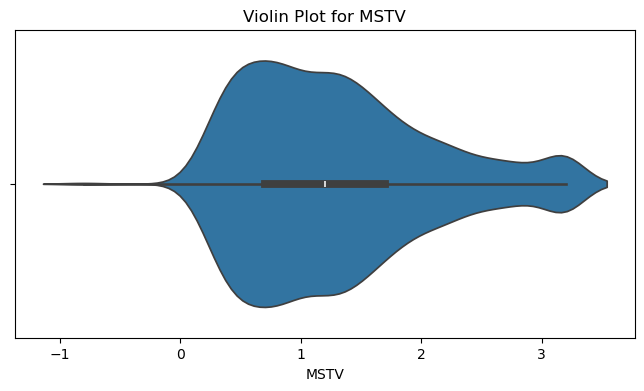

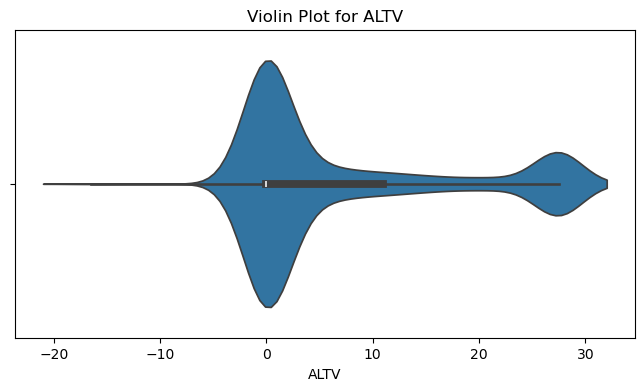

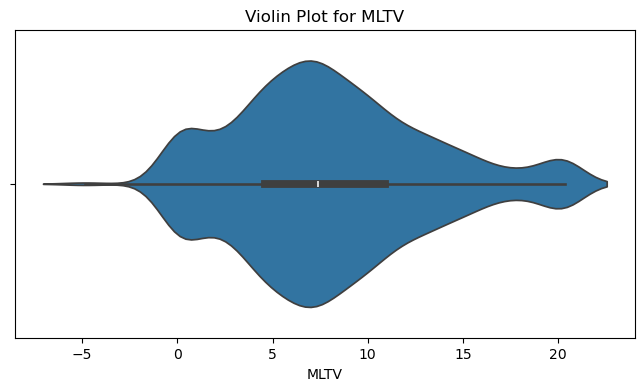

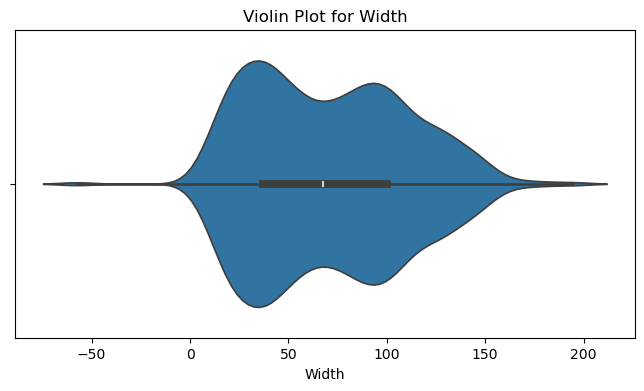

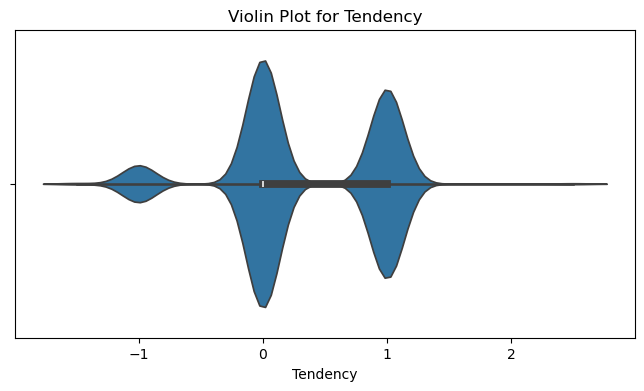

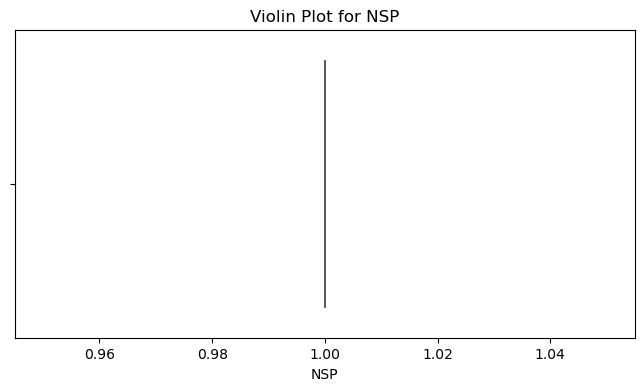

In [60]:
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=df[col])
    plt.title(f"Violin Plot for {col}")
    plt.show()

# 4.	Pattern Recognition and Insights:

In [64]:
## Corelation
corr=df.corr()
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.081715,-0.006829,-0.163801,-0.156858,NaN,NaN,0.286501,-0.297040,0.323777,-0.041651,-0.140008,0.281361,NaN
AC,-0.081715,1.000000,0.077516,0.092527,-0.103891,NaN,NaN,-0.272948,0.216529,-0.410734,-0.151983,0.284221,0.029530,NaN
FM,-0.006829,0.077516,1.000000,-0.317088,-0.019641,NaN,NaN,0.156314,0.069706,-0.013130,-0.036495,0.165149,0.000690,NaN
UC,-0.163801,0.092527,-0.317088,1.000000,0.270433,NaN,NaN,-0.217603,0.299700,-0.295354,-0.072767,0.131446,-0.074465,NaN
DL,-0.156858,-0.103891,-0.019641,0.270433,1.000000,NaN,NaN,-0.113746,0.566593,-0.295959,-0.242170,0.516180,0.014573,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.286501,-0.272948,0.156314,-0.217603,-0.113746,NaN,NaN,1.000000,-0.434974,0.438939,-0.324869,-0.243003,-0.010316,NaN
MSTV,-0.297040,0.216529,0.069706,0.299700,0.566593,NaN,NaN,-0.434974,1.000000,-0.541561,0.013248,0.650855,-0.063484,NaN
ALTV,0.323777,-0.410734,-0.013130,-0.295354,-0.295959,NaN,NaN,0.438939,-0.541561,1.000000,-0.133663,-0.441284,0.050687,NaN


In [66]:
strong_corrs = corr[(corr > 0.7) & (corr < 1.0)].dropna(how='all').dropna(axis=1, how='all')
print("Strong correlations:\n", strong_corrs)

Strong correlations:
 Empty DataFrame
Columns: []
Index: []


In [68]:
# Replace Infinite Values and Handle Missing Data
df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)  # Replace inf with NaN
df = df.dropna()  # Drop rows with NaN


In [70]:
# Multicollinearity Detection using VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['columns'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

vif.sort_values(by='VIF', ascending=False)


C:\Users\Ananya\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,columns,VIF
13,NSP,250.112011
8,MSTV,2.686258
4,DL,2.341795
11,Width,2.325965
9,ALTV,1.926730
1,AC,1.807517
7,ASTV,1.729009
10,MLTV,1.662201
3,UC,1.336453
0,LB,1.280894


In [74]:
# Feature Relevance using F-test (f_regression)
from sklearn.feature_selection import f_regression

y = df[['LB']]  # Target variable
x = df.drop(columns='LB')  # Features

f_r = f_regression(x, y)
f_r

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1.41234035e+01, 9.79784810e-02, 5.79253619e+01, 5.29982140e+01,
        0.00000000e+00, 0.00000000e+00, 1.87876969e+02, 2.03315745e+02,
        2.46043756e+02, 3.65110806e+00, 4.20075227e+01, 1.80622639e+02,
        0.00000000e+00]),
 array([1.75869032e-04, 7.54300224e-01, 4.08420173e-14, 4.69541508e-13,
        1.00000000e+00, 1.00000000e+00, 5.08692627e-41, 4.20690658e-44,
        1.60230756e-52, 5.61678952e-02, 1.12959437e-10, 1.45371506e-39,
        1.00000000e+00]))

In [76]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_sca = StandardScaler()
min_max = MinMaxScaler()
rob_sca = RobustScaler()

# Apply standard scaling to specific columns
x[['AC', 'FM', 'UC', 'DL']] = std_sca.fit_transform(x[['AC', 'FM', 'UC', 'DL']])

In [78]:
x

,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,-0.818008,-0.631707,-1.450225,-0.661947,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,0.841973,-0.631707,0.671045,0.530982,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,0.046450,-0.631707,1.311479,0.580522,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,-0.151678,-0.631707,1.124021,0.295756,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,0.877119,-0.631707,1.257504,-0.661947,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,-0.818008,1.951573,1.018902,-0.661947,0.0,0.0,79.0,0.2,25.0,7.20,40.0,0.000000,1.0
2122,-0.616457,-0.631707,0.870437,-0.661947,0.0,0.0,78.0,0.4,22.0,7.10,66.0,1.000000,1.0
2123,-0.562908,-0.631707,0.831700,-0.661947,0.0,0.0,79.0,0.4,20.0,6.10,67.0,1.000000,1.0
2124,-0.641360,-0.631707,0.581399,-0.661947,0.0,0.0,78.0,0.4,27.0,7.00,66.0,1.000000,1.0


# 5. Conclusion